<a href="https://colab.research.google.com/github/Suriyakrishnansuriya/Cars_Model-Price_Prediction/blob/main/Cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**

# **Title : Cars Price Prediction(Regression Dataset)**

**In this project wanna go to predict the Cars Price from the given dataset.**

# **Import the necessory libraries**



In [474]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy import stats
import time
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from xgboost import XGBRegressor

In [475]:
# read the dataset
data= pd.read_csv('cars_price.csv')

# **Explorary data analysis**

In [476]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [477]:
# in the dataset data['normalized-losses'] have so many invalid values
data[data['normalized-losses']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [478]:
# how many invalid values in this dataframe
(data=='?').sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [479]:
# in this data have some invalid values so need to replace that values into Nan values
data.replace('?', np.nan)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [480]:
data= data.replace('?', np.nan)

In [481]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [482]:
# row and columns
data.shape

(205, 26)

In [483]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [484]:
# check how many number of unique values in normalized column
data['normalized-losses'].nunique()

51

In [485]:
# check number of unique values & unique values in percular columns
# for which colunns is need to apply labelencoding
for col in data.columns:
  print(data[col], data[col].unique())
  print(data[col], data[col].nunique())

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64 [ 3  1  2  0 -1 -2]
0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64 6
0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object [nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object 51
0      alfa-romero
1      alfa-romero
2     

In [486]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [487]:
# count the cars depend on the manufactures
count=data['make'].value_counts().reset_index(name='count').rename(columns={'index':'manufacture'})
count

,manufacture,count
0,toyota,32
1,nissan,18
2,mazda,17
3,mitsubishi,13
4,honda,13
5,volkswagen,12
6,subaru,12
7,peugot,11
8,volvo,11
9,dodge,9


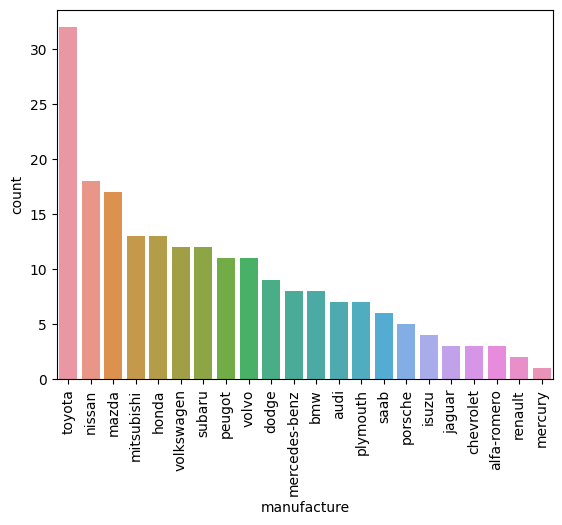

In [488]:
# plot the count by manufactures
ax= sns.barplot(data=count, x='manufacture',y='count')
ax.tick_params(axis='x', rotation=90)

In [489]:
# count the cars depend on fuel-type
count=data['fuel-type'].value_counts().reset_index(name='count').rename(columns={'index':'fuel-type'})
count

,fuel-type,count
0,gas,185
1,diesel,20


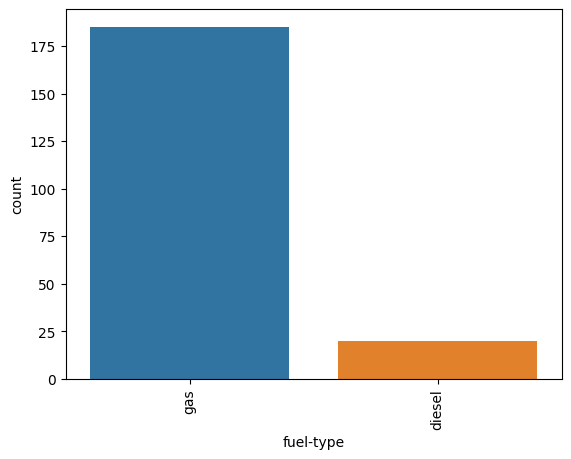

In [490]:
# plot the count by fuel-type
ax= sns.barplot(data=count, x='fuel-type',y='count')
ax.tick_params(axis='x', rotation=90)

In [491]:
data.select_dtypes('float').columns

Index(['wheel-base', 'length', 'width', 'height', 'compression-ratio'], dtype='object')

# **apply LabelEncoding**

In [492]:
# to fit Labelencoding
categorical= ['make','fuel-type', 'aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders',
              'fuel-system']
le= LabelEncoder()
for col in categorical:
  le.fit(data[col])
  data[col]= le.transform(data[col])

In [493]:
# after applied labelencoding to check how many object columns are there
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

# **dropped all Non-values rows**

**to create data_drop and check mean square error, best fitted line,ex..**

In [494]:
# drop all NON-values in the dataset and use this datasets to fit the model
data_drop= data.dropna(inplace=False)

In [495]:
# change object into float
cols= ['bore','stroke']
for col in cols:
  data_drop[col]= data_drop[col].astype(float)

<ipython-input-495-f819c7701d0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop[col]= data_drop[col].astype(float)


In [496]:
# change object to integer
cols= ['horsepower','peak-rpm','price','normalized-losses']
for col in cols:
  data_drop[col]= data_drop[col].astype(int)

<ipython-input-496-55b4d5dad4fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop[col]= data_drop[col].astype(int)


In [497]:
# all Non-values dropped dataset called 'data_drop'
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized-losses  160 non-null    int64  
 2   make               160 non-null    int64  
 3   fuel-type          160 non-null    int64  
 4   aspiration         160 non-null    int64  
 5   num-of-doors       160 non-null    int64  
 6   body-style         160 non-null    int64  
 7   drive-wheels       160 non-null    int64  
 8   engine-location    160 non-null    int64  
 9   wheel-base         160 non-null    float64
 10  length             160 non-null    float64
 11  width              160 non-null    float64
 12  height             160 non-null    float64
 13  curb-weight        160 non-null    int64  
 14  engine-type        160 non-null    int64  
 15  num-of-cylinders   160 non-null    int64  
 16  engine-size        160 non

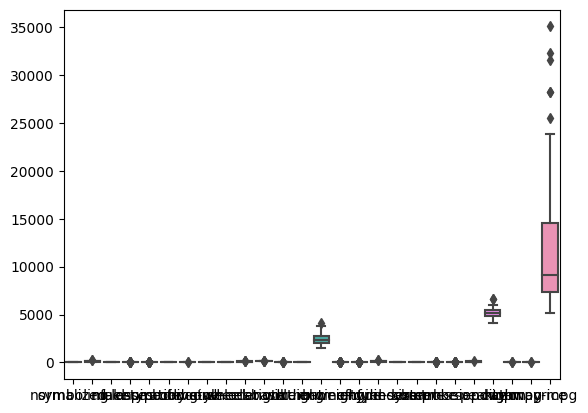

In [498]:
# box plot of data_drop
sns.boxplot(data_drop)
plt.show()

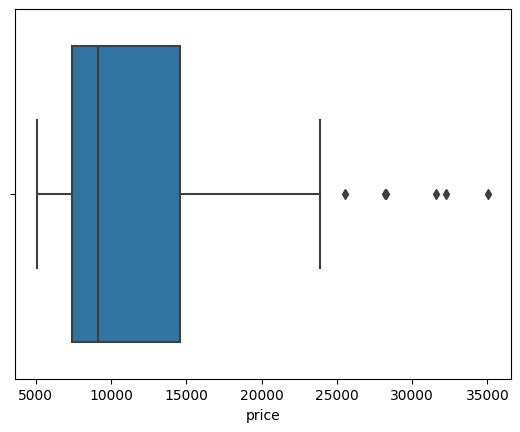

In [499]:
sns.boxplot(x=data_drop['price'])
plt.show()

# **to split the 'data_drop' dataset**



In [500]:
# spllit the data_drop to x,y
lr= LinearRegression()
drop_x_train= data_drop.iloc[:, :-1]
drop_y_train= data_drop.iloc[:,-1]

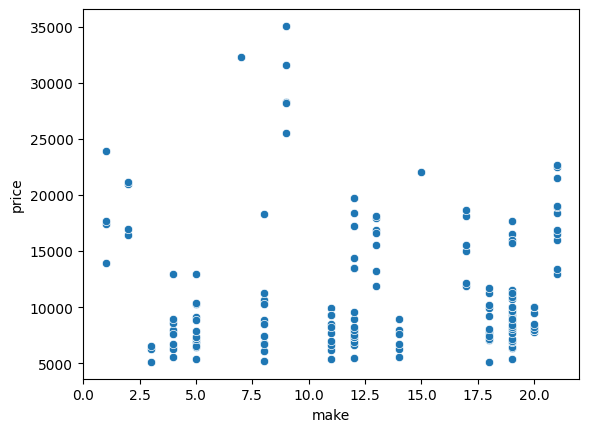

In [501]:
sns.scatterplot(data=data_drop, x=data_drop['make'],y=data_drop['price'])
plt.show()

# **to show the best fitted line using slop, intercept and std_err**

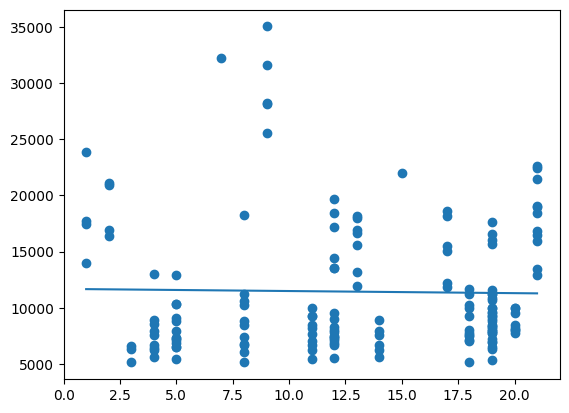

In [502]:
# plot the best fitted line in this data using slope , intercept and std_err
x=data_drop['make'].values
y=data_drop['price'].values
slope, intercept,r,p,std_err= stats.linregress(x,y)
def myfunc(x):
  return slope*x+intercept

predicted_y=[]
for x_value in x:
  predicted_y.append(myfunc(x_value))
plt.scatter(x,y)
plt.plot(x,predicted_y)
plt.show()

# **Feature Selection and apply Standard scaler(dropped data)**

In [503]:
ss= StandardScaler()
standard= ss.fit_transform(drop_x_train)
pca= PCA(n_components=25)
pca_feature= pca.fit_transform(standard)
pca_feature

array([[ 2.03941394e-01,  1.10747657e+00, -1.89745508e-01, ...,
         2.28763201e-01,  1.86218492e-01, -1.11169285e-17],
       [ 1.17554020e+00,  1.38977118e+00, -8.06251136e-01, ...,
         1.95064124e-01, -2.63240712e-02,  2.38830388e-17],
       [ 3.16851029e+00,  6.23203189e-01, -3.74734916e-01, ...,
        -1.17156935e-01, -3.41771080e-02, -2.81715431e-18],
       ...,
       [ 4.60662321e+00,  3.56926387e-02, -2.49599041e+00, ...,
        -1.75066254e-01, -1.45398822e-01, -1.01932896e-18],
       [ 4.12936528e+00, -3.33108657e+00,  2.88267674e+00, ...,
         2.82984616e-01,  7.77318684e-02, -5.31105423e-18],
       [ 4.80090117e+00, -7.34314377e-01, -1.11078262e+00, ...,
        -3.34150746e-01,  2.29698897e-01,  4.95777668e-18]])

In [504]:
pca.explained_variance_*100

array([8.32238158e+02, 3.72055317e+02, 2.55870196e+02, 1.55956801e+02,
       1.33249033e+02, 1.10082400e+02, 9.37119675e+01, 7.98561648e+01,
       6.79978171e+01, 5.77517391e+01, 5.00929181e+01, 3.77555762e+01,
       3.66313362e+01, 2.81559919e+01, 2.44766671e+01, 2.21863589e+01,
       1.96083280e+01, 1.32090539e+01, 8.36547641e+00, 6.86887294e+00,
       4.30694296e+00, 2.36534361e+00, 1.87689333e+00, 4.24988507e-01,
       1.01023882e-32])

In [505]:
np.cumsum(pca.explained_variance_*100)

array([ 832.23815764, 1204.29347428, 1460.16366978, 1616.12047072,
       1749.3695034 , 1859.45190296, 1953.16387051, 2033.02003526,
       2101.01785238, 2158.76959147, 2208.86250955, 2246.61808577,
       2283.24942199, 2311.40541391, 2335.88208106, 2358.06843999,
       2377.67676797, 2390.88582187, 2399.25129828, 2406.12017122,
       2410.42711418, 2412.79245778, 2414.66935112, 2415.09433962,
       2415.09433962])

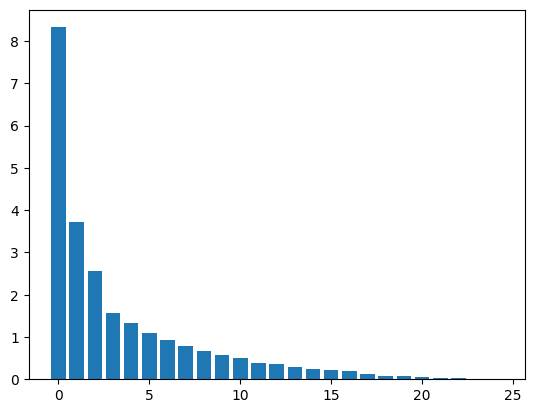

In [506]:
# to plot how much of varience in this dataset
plt.bar(range(25), pca.explained_variance_)
plt.show()

In [507]:
drop_x_train.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')

In [508]:
# drop the low varience columns from the dataset
drop_x_train.drop(['compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg',
                   'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke'],axis=1, inplace=True)

In [509]:
drop_x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 3 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized-losses  160 non-null    int64  
 2   make               160 non-null    int64  
 3   fuel-type          160 non-null    int64  
 4   aspiration         160 non-null    int64  
 5   num-of-doors       160 non-null    int64  
 6   body-style         160 non-null    int64  
 7   drive-wheels       160 non-null    int64  
 8   engine-location    160 non-null    int64  
 9   wheel-base         160 non-null    float64
 10  length             160 non-null    float64
 11  width              160 non-null    float64
 12  height             160 non-null    float64
 13  curb-weight        160 non-null    int64  
 14  engine-type        160 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 20.0 KB


**split the dataset for 100 times to get the average train and test errors whether this data is overfitting or underfitting**

In [510]:
train_err=[]
test_err=[]
for index in range(100):
  X_train,X_test,y_train,y_test= train_test_split(drop_x_train,drop_y_train, test_size=0.2)
  ss= StandardScaler()
  X_train=ss.fit_transform(X_train)
  X_test=ss.transform(X_test)
  lr.fit(X_train, y_train)
  predicted_y_train= lr.predict(X_train)
  predicted_y_test= lr.predict(X_test)
  train_err.append(mean_squared_error(y_train,predicted_y_train))
  test_err.append(mean_squared_error(y_test,predicted_y_test))

print('mean_squared_error train', sum(train_err)/len(train_err))
print('mean_squared_error test', sum(test_err)/len(test_err))

mean_squared_error train 4574939.968754337
mean_squared_error test 6160187.340197666


# **Linear Regression**
**for dropped all non values dataset**

In [511]:
# split the data_drop to train and test
# execute the model and predict the price for train data
X_train,X_test,y_train,y_test= train_test_split(drop_x_train,drop_y_train, test_size=0.2, random_state=19)
lr.fit(X_train, y_train)
predicted_y_train= lr.predict(X_train)
print(mean_squared_error(y_train, predicted_y_train))

4509326.858985315


In [512]:
# split the data_drop to train and test
# execute the model and predict the price for test data
predicted_y_test= lr.predict(X_test)
print(mean_squared_error(y_test, predicted_y_test))
print(lr.score(X_test, y_test))
print(r2_score(y_test, predicted_y_test))

6659223.206568569
0.8103450459834531
0.8103450459834531


# **Regularization**

In [513]:
lasso= Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
predicted_y_train= lasso.predict(X_train)
print(mean_squared_error(y_train, predicted_y_train))
predicted_y_test= lasso.predict(X_test)
print(mean_squared_error(y_test, predicted_y_test))

4509327.732850082
6658268.46147792


In [514]:

penalty = 'l2'

# Set the regularization strength (C)
C = 0.01

# Create a logistic regression model
model = LogisticRegression(penalty='l2', C=1.0)

# Train the model on the training set
model.fit(X_train, y_train)
predicted_y_test= model.predict(X_test)
# Evaluate the model on the test set
print(r2_score(y_test, predicted_y_test))
print(mean_squared_error(y_test, predicted_y_test))

0.754618947438467
8615895.15625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Data Preprocessing for Original dataset**

In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [351]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.4,23.0,106,4800,26,27,22470


In [352]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# **Filling Non Values using Regression model prediction**

In [353]:
data[data['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,1,1,0,1,3,1,0,99.8,...,136,5,3.19,3.4,8.5,110,5500,19,25,15250
7,1,NaN,1,1,0,0,4,1,0,105.8,...,136,5,3.19,3.4,8.5,110,5500,19,25,18920
9,0,NaN,1,1,1,1,2,0,0,99.5,...,131,5,3.13,3.4,7.0,160,5500,16,22,NaN
14,1,NaN,2,1,0,0,3,2,0,103.5,...,164,5,3.31,3.19,9.0,121,4250,20,25,24565
15,0,NaN,2,1,0,0,3,2,0,103.5,...,209,5,3.62,3.39,8.0,182,5400,16,22,30760
16,0,NaN,2,1,0,1,3,2,0,103.5,...,209,5,3.62,3.39,8.0,182,5400,16,22,41315
17,0,NaN,2,1,0,0,3,2,0,110.0,...,209,5,3.62,3.39,8.0,182,5400,15,20,36880


**'bore', 'stroke', 'horsepower','peak-rpm' and 'price' columns are minimum Non-values are there, these method of 'pad' to filling the Non-values.**

In [354]:
data['bore']= data['bore'].fillna(method='pad')
data['stroke']= data['stroke'].fillna(method='pad')
data['horsepower']= data['horsepower'].fillna(method='pad')
data['peak-rpm']= data['peak-rpm'].fillna(method='pad')
data['price']= data['price'].fillna(method='pad')

**some columns are object class so we need to change that numerical data**

In [355]:
# change object into float
cols= ['bore','stroke']
for col in cols:
  data_drop[col]= data_drop[col].astype(float)

<ipython-input-355-f819c7701d0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop[col]= data_drop[col].astype(float)


In [356]:
# change object into integer
cols= ['horsepower','peak-rpm','price','normalized-losses']
for col in cols:
  data_drop[col]= data_drop[col].astype(int)

<ipython-input-356-0376e8b371f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop[col]= data_drop[col].astype(int)


**most of the Non-values have normalized-losses column**

In [357]:
# all rows where normalized-losses is null

to_predict= data[data['normalized-losses'].isnull()].drop(['normalized-losses'],axis=1)   # normalized-losses Non-values data

train= data.dropna()   # drop all Non-values in the data
# dropping columns
X= train.drop('normalized-losses', axis=1)
ss= StandardScaler()
y= train['normalized-losses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**to predict most most commanly use regression models**

In [358]:
models = [('Linear Regresion', LinearRegression()),
          ('Gradient Boosting', GradientBoostingRegressor()),
          ('Random Forest', RandomForestRegressor())]
for model in models: #for loop through the three models
    reg = model[1]  #initialize the model object
    reg.fit(X_train,y_train)  #fitting the training data
    pred = reg.predict(X_test)  #predict target
    print(model[0])
    print('R2: ',r2_score(y_test, pred))  #check r2 score
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))  #check root mean squared error
    print('-'*30)

Linear Regresion
R2:  0.5898126355135704
RMSE:  18.432339796745808
------------------------------
Gradient Boosting
R2:  0.6724835690746694
RMSE:  16.470465558566655
------------------------------
Random Forest
R2:  0.6180498670731707
RMSE:  17.786588665723293
------------------------------


**Gradient Boosting Regressor have a better r2_score and error also its low,
predict normalized-losses Non-values are predicted using GradientBoostingRegressort**

In [359]:
gbr= GradientBoostingRegressor()
gbr.fit(X,y)
fill= gbr.predict(to_predict)
to_predict['normalized-losses'] = fill  #filling the null values
data = pd.concat([data.dropna(),to_predict]).reindex(data.index)  #adding the rows in which total_bedrooms was null and reset indexes

In [360]:
# # filling Non-values
# data=data.fillna(method='pad')
# data=data.fillna(method='bfill')

In [361]:
# # change object into float
# cols= ['bore','stroke']
# for col in cols:
#   data_drop[col]= data_drop[col].astype(float)

In [362]:
# # change object into integer
# cols= ['horsepower','peak-rpm','price','normalized-losses']
# for col in cols:
#   data_drop[col]= data_drop[col].astype(int)

In [363]:
data[data['make']==0]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,176.815423,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,176.815423,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,173.094928,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500


In [364]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [365]:
data['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

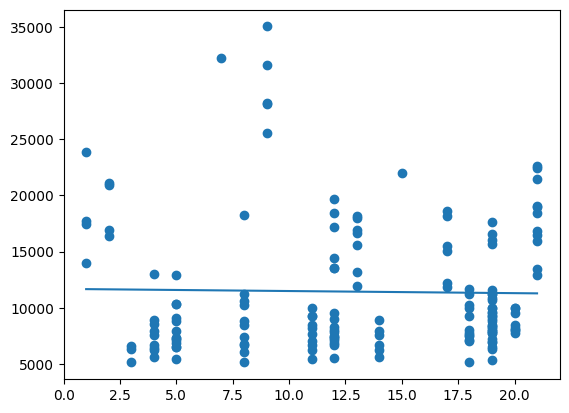

In [366]:
# plot the best fitted line in this data using slope , intercept and std_err
x=data_drop['make'].values
y=data_drop['price'].values
slope, intercept,r,p,std_err= stats.linregress(x,y)
def myfunc(x):
  return slope*x+intercept

predicted_y=[]
for x_value in x:
  predicted_y.append(myfunc(x_value))
plt.scatter(x,y)
plt.plot(x,predicted_y)
plt.show()

# **Feature Selection**

In [367]:
X= data.iloc[:,:-1]
ss= StandardScaler()
standard= ss.fit_transform(X)
pca= PCA(n_components=25)
pca_feature= pca.fit_transform(standard)
pca_feature

array([[-0.62014434,  4.06014209,  1.72214603, ..., -0.12241346,
         0.03569347, -0.02076524],
       [-0.62014434,  4.06014209,  1.72214603, ..., -0.12241346,
         0.03569347, -0.02076524],
       [ 0.38312779,  2.82065586,  0.62091229, ...,  0.18911971,
        -0.06717029,  0.06739788],
       ...,
       [ 3.53164879, -0.45982281, -2.30283695, ..., -0.28670662,
        -0.10883609, -0.12511614],
       [ 2.88733795, -3.77967416,  2.91068515, ..., -0.12110578,
         0.21212487,  0.10447434],
       [ 3.75011246, -1.3396325 , -1.0633175 , ..., -0.17706773,
        -0.242262  ,  0.23231423]])

In [368]:
np.cumsum(pca.explained_variance_*100)

array([ 772.63946134, 1223.68759119, 1456.00648367, 1607.89982707,
       1734.99696366, 1841.79654831, 1946.53057562, 2039.27436041,
       2119.35356906, 2178.9825547 , 2232.49888401, 2280.60024674,
       2319.86995019, 2357.02926147, 2392.03608051, 2420.89424291,
       2442.30220739, 2461.7559879 , 2480.34214788, 2491.96803624,
       2499.58354371, 2506.12353075, 2509.99382787, 2511.771618  ,
       2512.25490196])

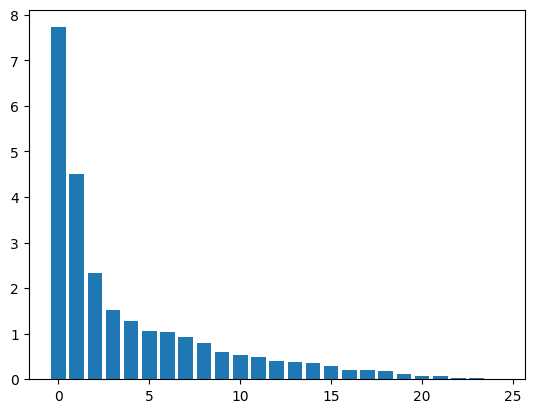

In [369]:
plt.bar(range(25), pca.explained_variance_)
plt.show()

# **Drop the low varience Columns**

In [370]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [371]:
# drop the low varience columns from the dataset
data.drop(['peak-rpm', 'city-mpg','highway-mpg'],axis=1, inplace=True)

# **applying Randomoversampler to oversampling the dataset**

In [372]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X,y= RandomOverSampler().fit_resample(X,y)

# **applying Standard scaler**

In [373]:
X.shape

(558, 22)

In [374]:
# split the data train and test
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=19)

In [375]:
ss=StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)

#**Evaluvation**

#**Predict the Cars Price applying most commonly using Regression Moduls**

# **LinearRegression**

In [376]:
# LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)
predicted_y_train= lr.predict(X_train)
predicted_y_test= lr.predict(X_test)
print(mean_squared_error(y_train, predicted_y_train))
print(mean_squared_error(y_test, predicted_y_test))

7202381.065394474
7174901.960922344


In [377]:
print('LinearRegression')
print('mean_absolute_error_train :',mean_absolute_error(y_train, predicted_y_train))
print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)
print('mean_squared_error_train :',mean_squared_error(y_train, predicted_y_train))
print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)
print('r2_score_train :',r2_score(y_train, predicted_y_train))
print('r2_score_test :',r2_score(y_test, predicted_y_test))

LinearRegression
mean_absolute_error_train : 1922.136313835219
mean_absolute_error_test : 2014.6361230477467
--------------------------------------------------
mean_squared_error_train : 7202381.065394474
mean_squared_error_test : 7174901.960922344
--------------------------------------------------
r2_score_train : 0.8950207293811749
r2_score_test : 0.8646938525388393


# **XGBRegressor**

In [378]:
xgb= XGBRegressor()
xgb.fit(X_train,y_train)
predicted_y_train= xgb.predict(X_train)
predicted_y_test= xgb.predict(X_test)
print(mean_squared_error(y_train, predicted_y_train))
print(mean_squared_error(y_test, predicted_y_test))

29961.021955531276
54992.31773152096


In [379]:
print('XGBRegressor')
print('mean_absolute_error_train :',mean_absolute_error(y_train, predicted_y_train))
print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)
print('mean_squared_error_train :',mean_squared_error(y_train, predicted_y_train))
print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)
print('r2_score_train :',r2_score(y_train, predicted_y_train))
print('r2_score_test :',r2_score(y_test, predicted_y_test))

XGBRegressor
mean_absolute_error_train : 39.10389552095011
mean_absolute_error_test : 79.82438441685268
--------------------------------------------------
mean_squared_error_train : 29961.021955531276
mean_squared_error_test : 54992.31773152096
--------------------------------------------------
r2_score_train : 0.9995632991085408
r2_score_test : 0.9989629407213174


# **DecisionTreeRegressor**

In [380]:
# DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)
predicted_y_train= dtr.predict(X_train)
predicted_y_test= dtr.predict(X_test)
print(mean_squared_error(y_train, predicted_y_train))
print(mean_squared_error(y_test, predicted_y_test))

29856.700112107625
49646.02232142857


In [381]:
print('DecisionTreeRegressor')
print('mean_absolute_error_train :',mean_absolute_error(y_train, predicted_y_train))
print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)
print('mean_squared_error_train :',mean_squared_error(y_train, predicted_y_train))
print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)
print('r2_score_train :',r2_score(y_train, predicted_y_train))
print('r2_score_test :',r2_score(y_test, predicted_y_test))

DecisionTreeRegressor
mean_absolute_error_train : 32.4652466367713
mean_absolute_error_test : 59.6875
--------------------------------------------------
mean_squared_error_train : 29856.700112107625
mean_squared_error_test : 49646.02232142857
--------------------------------------------------
r2_score_train : 0.9995648196655529
r2_score_test : 0.9990637625358968


# **RandomForestRegressor**

In [382]:
# RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(X_train,y_train)
predicted_y_train= rfr.predict(X_train)
predicted_y_test= rfr.predict(X_test)
print(mean_squared_error(y_train, predicted_y_train))
print(mean_squared_error(y_test, predicted_y_test))

114996.43045215796
350129.9567357032


In [383]:
print('RandomForestRegressor')
print('mean_absolute_error_train :',mean_absolute_error(y_train, predicted_y_train))
print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)
print('mean_squared_error_train :',mean_squared_error(y_train, predicted_y_train))
print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)
print('r2_score_train :',r2_score(y_train, predicted_y_train))
print('r2_score_test :',r2_score(y_test, predicted_y_test))

RandomForestRegressor
mean_absolute_error_train : 182.75747910721557
mean_absolute_error_test : 384.04465035559673
--------------------------------------------------
mean_squared_error_train : 114996.43045215796
mean_squared_error_test : 350129.9567357032
--------------------------------------------------
r2_score_train : 0.9983238541139347
r2_score_test : 0.9933971591786656


# **GradientBoostingRegressor**

In [384]:
gbr= GradientBoostingRegressor()
gbr.fit(X_train,y_train)
predicted_y_train= gbr.predict(X_train)
predicted_y_test= gbr.predict(X_test)
print('GradientBoostingRegressor')
print('mean_absolute_error_train :',mean_absolute_error(y_train, predicted_y_train))
print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)
print('mean_squared_error_train :',mean_squared_error(y_train, predicted_y_train))
print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)
print('r2_score_train :',r2_score(y_train, predicted_y_train))
print('r2_score_test :',r2_score(y_test, predicted_y_test))

GradientBoostingRegressor
mean_absolute_error_train : 488.98655759671124
mean_absolute_error_test : 601.6246896312081
--------------------------------------------------
mean_squared_error_train : 428242.2197336329
mean_squared_error_test : 694604.1290831127
--------------------------------------------------
r2_score_train : 0.993758098125101
r2_score_test : 0.9869009765947006


# **final_model**

**DecisonTreeRegressor and XGBRegressor are given better r2 score and low mean squared errors,**
**XGBRegressor given work better than DecisionTreeRegressor**

In [385]:
print('final_model')
print('-'*50)
final_model= XGBRegressor()
final_model.fit(X_train,y_train)
predicted_y_test= final_model.predict(X_test)

print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)

print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)

print('r2_score_test :',r2_score(y_test, predicted_y_test))

final_model
--------------------------------------------------
mean_absolute_error_test : 79.82438441685268
--------------------------------------------------
mean_squared_error_test : 54992.31773152096
--------------------------------------------------
r2_score_test : 0.9989629407213174
